# INFO284 Machine Learning Group Exam Spring 2023

## Task 1: Machine learning on tabular mushrooms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#TO Encode, Scale and split data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#The Models we are going to use
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#To make a print_score function
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

First we want to load the dataset, and see what the dataset cointains.

In [2]:
dataset =  pd.read_csv("agaricus-lepiota.csv")
dataset.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


As we can see above, the dataset is pretty messy and it is hard to determine what we actually are looking at. Therefore, we want to rename the columns. In the description file of the dataset (found in the agaricus-lepiota.txt), we have the information that coulmn one is class, collumn two is cap-shape, and so forth. We therefore rename the collumns in that order.

In [3]:
dataset.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                   'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                   'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                   'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [4]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


Now we have a clearer overview of the dataset.
But, in order to send the dataset in an algorithm, we would need to change the characters in the cells to a numeric number. We then use the labelencoder for every column in the dataset.

In [5]:
Encoder = LabelEncoder()
for col in dataset.columns:
    dataset[col] = Encoder.fit_transform(dataset[col])

Here we have some default information about the dataset. We can see that the dataset only contains non-null values, and that the dataset dont have any missing attribute values. We can also see how many mushrooms the dataset contains.
We can alos get som information about the average value for ex. cap-color etc.

In [6]:
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8123 non-null   int32
 1   cap-shape                 8123 non-null   int32
 2   cap-surface               8123 non-null   int32
 3   cap-color                 8123 non-null   int32
 4   bruises                   8123 non-null   int32
 5   odor                      8123 non-null   int32
 6   gill-attachment           8123 non-null   int32
 7   gill-spacing              8123 non-null   int32
 8   gill-size                 8123 non-null   int32
 9   gill-color                8123 non-null   int32
 10  stalk-shape               8123 non-null   int32
 11  stalk-root                8123 non-null   int32
 12  stalk-surface-above-ring  8123 non-null   int32
 13  stalk-surface-below-ring  8123 non-null   int32
 14  stalk-color-above-ring    8123 non-null 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.0,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,0.481965,3.347901,1.827650,4.504740,0.415487,4.144528,0.974147,0.161517,0.309122,4.810784,...,1.603595,5.816201,5.794534,0.0,1.965530,1.069432,2.291764,3.596947,3.644097,1.508187
std,0.499705,1.604323,1.229947,2.545972,0.492836,2.103758,0.158705,0.368030,0.462160,3.540565,...,0.676001,1.901819,1.907362,0.0,0.242684,0.271080,1.801683,2.382744,1.252139,1.719645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Then, we want to get a quick overview of how many mushrooms are poisonous or not. We can see that there are roughly the same amount of poisonous and edible.

<Axes: xlabel='class', ylabel='count'>

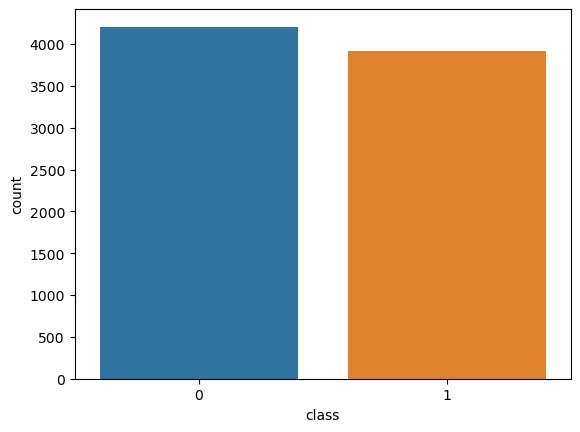

In [7]:
sns.countplot(x='class', data=dataset)

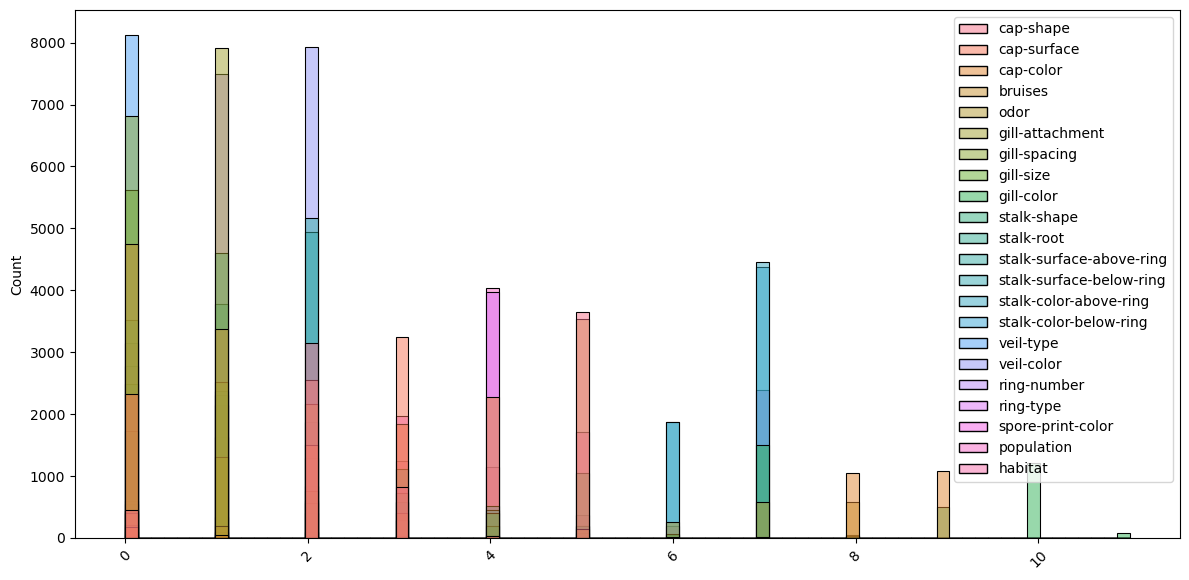

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset.drop('class', axis=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Then we want to generate a heatmap to visualize the correlation between the attributes.

We want to use the heatmap to identify which features are strongly correlated with the target variable ('class') and with each other. This can help us determine which features we should drop in order to create a more accurate model.

<Axes: >

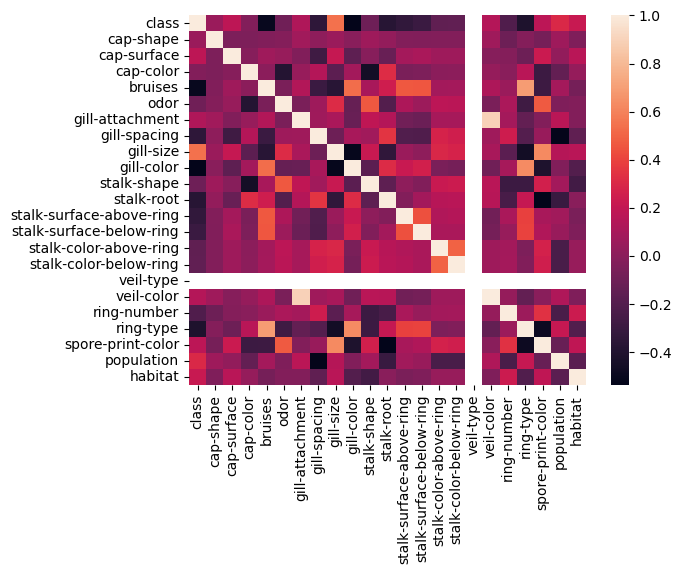

In [9]:
sns.heatmap(dataset.corr())

As the heatmap show above, white cells shows a high correlation, and if the attribute is strongly correlated with the target variable 'class' it is not a useful feature for the prediction and should be dropped. Also, we can see that some attributes are highly correleted with eachother, we would need to choose to drop one of them to avoid multicollinearity.

Due to the logical rules embedded within the dataset (found in the agaricus-lepiota.txt), it may be necessary to drop certain columns during data preprocessing. Specifically, it may be beneficial to remove the features that are the most indicative, as they may lead to overfitting and compromise the generalizability of the model. Therefore, these features should be removed prior to running the models to ensure the accuracy and robustness of the resulting model.

In [10]:
drop_features = ['odor', 'spore-print-color', 'habitat', 'stalk-shape','gill-size','gill-spacing','bruises',
                 'gill-color','stalk-root','ring-type','stalk-surface-below-ring','stalk-surface-above-ring',
                'population', 'cap-color']
dataset = dataset.drop(drop_features, axis=1)

In [11]:
X=dataset.drop('class',axis=1)
y=dataset['class']

Splitting the dataset into the Training set and Test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

We want to use KNN, DecisionTreeclassifier and RandomForrestClassifier.
The reason for each is:

We want to use KNN because its a "lazy" algorithm that is easy to implement and interpret. KNN is very efficient and accurate for small datasets, and we think therefore this is a good fit for our dataset. We are going to use gridsearch to get the most optimal number of neighbours.

Random Forrest is a useful algorithm for the mushroom dataset because it can handle large amounts of data and noisy or missing data. Since the mushroom dataset contains many different attributes the Random Forest can be used to identify which attributes are most important for classification by creating multiple decision trees and combining their results.

Decision Tree is well-suited for the mushroom dataset since it can handle non-linear classification problems and can capture the complex interactions between the features. Additionally, decision trees are easy to interpret, which can be useful for understanding which features are most important for classification.

Overall, the combination of these three algorithms provides a good balance between accuracy, interpretability, and robustness for the classification task.

In [13]:
#Grid search to find best parameter
knn_gs = KNN()
param_grid = {'n_neighbors': range(1, 31)}  # Define the range of neighbors to test
grid_search = GridSearchCV(knn_gs, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_param = grid_search.best_params_['n_neighbors']# get the best parameter
print("Best param:",best_param)

Best param: 16


After performing a grid search, we found that the optimal parameter value for the given model is 19. This means that using a parameter value of 19 results in the best performance for the model on the metric that was used to evaluate its performance.
Its important to note that the specific hyperparameters selected for the grid search will depend on the model and problem being addressed. Therefore, while the parameter value of 19 is the best for this particular problem, it may not be the optimal value for other models or problems.
However, we want to use this parameter for both our algorithms because we want to see which performs the best, therefore it is important to use the same parameters.

In [14]:
#KNN
knn = KNN(n_neighbors=best_param)
knn.fit(X_train,y_train)

#DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=best_param)
dtc.fit(X_train,y_train)

#RandomForrestClassifier
rfc = RandomForestClassifier(n_estimators=best_param)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=16)

In [15]:
#A function to print a classification report for the different models.
def print_score(classifier,X_train,y_train,X_test,y_test, name):
    print("Training results for", name, ":\n")
    print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))

In [16]:
print_score(knn,X_train,y_train,X_test,y_test,"KNN")
print_score(dtc,X_train,y_train,X_test,y_test,"DTC")
print_score(rfc,X_train,y_train,X_test,y_test,"RFC")

Training results for KNN :

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2945
           1       0.83      0.79      0.81      2741

    accuracy                           0.82      5686
   macro avg       0.82      0.82      0.82      5686
weighted avg       0.82      0.82      0.82      5686


Training results for DTC :

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      2945
           1       0.80      0.88      0.84      2741

    accuracy                           0.83      5686
   macro avg       0.84      0.84      0.83      5686
weighted avg       0.84      0.83      0.83      5686


Training results for RFC :

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.82      2945
           1       0.78      0.92      0.84      2741

    accuracy               

Our best performing model for the given dataset is the Random Forest Classifier, with an average accuracy score of 85%. While this is a promising result, it's important to acknowledge that the model is still making some incorrect predictions for 15% of the data, which can be potentially dangerous in certain contexts.

It's worth noting that the dataset originally yielded perfect accuracy for all three models, so this drop in performance is a result of the reduced dataset. However, because we wanted to test the models it was necessary to reduce the number of columns in the dataset, or to modify the logical rules to create a more representative test set.

The Decision Tree Classifier is a model that recursively splits the data based on the most significant feature until a prediction can be made. While this model is powerful in certain contexts, the Random Forest Classifier may perform better because it is an ensemble of Decision Trees, where each tree makes a prediction and the final prediction is made by combining the predictions of all trees. This ensemble approach can improve the precision of the model, as it is less susceptible to overfitting to noisy data or outliers.